$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [132]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [4]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\4177423669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


Customer_ID: A unique identifier for each customer.

Month: The month associated with the recorded data (e.g., transaction month or reporting month).

Name: The name of the customer.

Age: The age of the customer.

SSN: Social Security Number (or equivalent), a unique identifier for individuals.

Occupation: The occupation or job role of the customer.

Annual_Income: The total annual income of the customer.

Monthly_Inhand_Salary: The monthly take-home salary of the customer.

Num_Bank_Accounts: The number of bank accounts held by the customer.

Num_Credit_Card: The number of credit cards owned by the customer.

Interest_Rate: The interest rate on the customer's credit products (e.g., loans or credit cards).

Num_of_Loan: The number of loans the customer has taken.

Type_of_Loan: The type(s) of loans the customer has (e.g., personal, mortgage, auto).

Delay_from_due_date: The number of days the customer delays payments from the due date.

Num_of_Delayed_Payment: The number of times the customer has delayed payments.

Changed_Credit_Limit: Indicates whether the customer's credit limit has changed (possibly a binary or categorical feature).

Num_Credit_Inquiries: The number of times the customer's credit report has been accessed by lenders (credit inquiries).

Credit_Mix: The mix of credit types the customer has (e.g., revolving, installment).

Outstanding_Debt: The total outstanding debt the customer owes.

Credit_Utilization_Ratio: The ratio of the customer's credit card balances to their credit limits.

Credit_History_Age: The length of the customer's credit history (likely in months or years).

Payment_of_Min_Amount: Indicates whether the customer pays only the minimum amount due (possibly a binary or categorical feature).

Total_EMI_per_month: The total Equated Monthly Installment (EMI) the customer pays monthly for loans.

Amount_invested_monthly: The amount the customer invests monthly (if applicable).

Payment_Behaviour: Describes the customer's payment behavior (e.g., on-time, late, etc.).

Monthly_Balance: The monthly balance in the customer's account(s).

Credit_Score: The credit score of the customer, which reflects their creditworthiness.

In [5]:
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


#### from show the data i noticed that 
###### 1.the coustomer name repetead because it`s calculate month by month (can do group by to get insght)
###### 2.in sample 2 the age is -5000 and it is inconsistency
###### 3.there are many null values
###### 4.target is object


In [6]:
test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### the insight from this is
###### 1.there are 28 coulumns the target is Credit_Score it is object coulumn 
###### 2.there are float64(4), int64(4), object(20)
###### 3.there are 100000 entries, 0 to 99999
###### 4.there are many null values in same coulumns like Amount_invested_monthly which is object and Num_Credit_Inquiries  which is float
###### 5.this deal with age and annual_income as object >> need to convert it to float



In [8]:
Numerical=train.select_dtypes(exclude='object').columns.tolist()
Numerical

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

In [9]:
categorical=train.select_dtypes(include='object').columns.tolist()
categorical

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [10]:
cols_to_convert = ['Age', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Monthly_Balance','Num_of_Delayed_Payment',"Amount_invested_monthly"]
for col in cols_to_convert:
    train[col] = pd.to_numeric(train[col], errors='coerce')

In [11]:
train.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T.style.background_gradient(cmap='viridis')

,count,mean,std,min,1%,25%,50%,75%,99%,max
Age,95061.000000,110.934505,689.407864,-500.000000,14.000000,24.000000,33.000000,42.000000,4177.400000,8698.000000
Annual_Income,93020.000000,178578.964199,1442878.388969,7005.930000,7534.185000,19435.600000,37550.740000,72843.380000,483847.780000,24198062.000000
Monthly_Inhand_Salary,84998.000000,4194.170850,3183.686167,303.645417,531.875417,1625.568229,3093.745000,5957.448333,13814.930000,15204.633333
Num_Bank_Accounts,100000.000000,17.091280,117.404834,-1.000000,0.000000,3.000000,6.000000,7.000000,445.010000,1798.000000
Num_Credit_Card,100000.000000,22.474430,129.057410,0.000000,1.000000,4.000000,5.000000,7.000000,849.000000,1499.000000
Interest_Rate,100000.000000,72.466040,466.422621,1.000000,1.000000,8.000000,13.000000,20.000000,2865.010000,5797.000000
Num_of_Loan,95215.000000,2.780339,62.500940,-100.000000,-100.000000,1.000000,3.000000,5.000000,9.000000,1496.000000
Delay_from_due_date,100000.000000,21.068780,14.860104,-5.000000,0.000000,10.000000,18.000000,28.000000,61.000000,67.000000
Num_of_Delayed_Payment,90254.000000,31.033051,226.955758,-3.000000,0.000000,9.000000,14.000000,18.000000,27.000000,4397.000000
Changed_Credit_Limit,97909.000000,10.389025,6.789496,-6.490000,-1.540000,5.320000,9.400000,14.870000,28.810000,36.970000


# the insight from this is (summarize)
#### 1.Age>>min is -500(this is not logic this is consistancy) && max and 99% is 4133 which is inconsistancy && there have many null value
#### 2.annaul_income>> may be need scaling && there have many null value
#### 3.Monthly_Inhand_Salary>> may be need scaling && there have many null value
#### 4.Num_Bank_Accounts >> this is min is -1 (not logic) inconsistancy && have outliers
#### 5.Num_Credit_Card >>may be there are outliers
#### 6.Interest_Rate>> there is outliers
#### 7.Num_of_Loan>>there have many null value && min is -100 (there is may be not logic)&& there is outliers
#### 8.Num_of_Delayed_Payment>> there is outliers and null values
#### 9.Changed_Credit_Limit>> null value
#### 10.Total_EMI_per_month>> outliers
#### 11. Monthly_Balance>> min is 0.007760 
###### 1.there is high variance in some coulumn like Total_EMI_per_month 
###### 2.there is maybe outliers in some coulumns like Num_Bank_Accounts and Num_Credit_Card

# the insight from this is (in details)

## Age
- 4,939 missing values
- Negative values (minimum: -500) are impossible for age
- Maximum age of 8,698 is impossible
- 99th percentile at 4,177 indicates many unrealistic values

## Annual_Income
- 6,980 missing values
- Extremely high standard deviation (1,442,878)
- Maximum value (24,198,062) appears unusually high
- Large gap between 75th percentile (72,843) and maximum

## Monthly_Inhand_Salary
- Large number of missing values (15,002)
- Doesn't align with annual income when divided by 12
- High standard deviation relative to mean

## Num_Bank_Accounts
- Negative values present (minimum: -1)
- Maximum of 1,798 accounts is unrealistic
- High standard deviation (117.40) indicates severe outliers
- Mean (17.09) is unrealistically high for typical consumer

## Num_Credit_Card
- Maximum of 1,499 credit cards is unrealistic
- High standard deviation (129.06) indicates severe outliers
- Mean (22.47) is unrealistically high for typical consumer

## Interest_Rate
- Maximum rate of 5,797% is unrealistic
- High standard deviation (466.42) suggests severe outliers
- Mean (72.47%) is unusually high for typical interest rates

## Num_of_Loan
- 4,785 missing values
- Negative values present (minimum: -100)
- Maximum of 1,496 loans is unrealistic
- High standard deviation (62.50) relative to mean

## Delay_from_due_date
- Negative delays present (minimum: -5)
- Unit of measurement unclear (days/months/years)

## Num_of_Delayed_Payment
- 9,746 missing values
- Negative values present (minimum: -3)
- Maximum of 4,397 delayed payments is unrealistic
- High standard deviation (226.96) indicates severe outliers

## Changed_Credit_Limit
- 2,091 missing values
- Negative values present (minimum: -6.49)
- Purpose and unit of measurement unclear

## Credit_Utilization_Ratio
- Minimum of 20% seems unusually high as lower bound
- Narrow range (20-50%) might indicate data truncation
- Perfect 100% data completion seems suspicious

## Total_EMI_per_month
- High standard deviation (8,306.04) indicates severe outliers
- Maximum (82,331) seems unusually high
- Large gap between 75th percentile and maximum

## Amount_invested_monthly
- 8,784 missing values
- Currency unit not specified
- Zero values need verification

## Monthly_Balance
- 1,209 missing values
- Some very low balances (minimum: 0.008) need verification
- Currency unit not specified

In [12]:
train.describe(include="object").style.background_gradient(cmap='coolwarm')

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,90015,100000,100000,88592,100000,90970,100000,100000,100000
unique,100000,12500,8,10139,12501,16,6260,4,404,3,7,3
top,0x1602,CUS_0xd40,January,Langep,#F%$D@*&8,_______,Not Specified,Standard,15 Years and 11 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,12500,44,5572,7062,1408,36479,446,52326,25513,53174


##### insigth from this 
###### 1.there are  unique 12500 Customer_ID and 10139 Name (null values in name maybe fill by coustomer id)
###### 2.there are unique 1788 Age and 18940 Annual_Income ,13178 Outstanding_Debt (they must be numerical)


#### cheking unique value

In [13]:
for col in list(train.describe(include="object")):
    print(f"Column: {col}'s count values:\n")

    # Create a dictionary to store value counts
    value_count_dict = {
        'Value': train[col].value_counts().index.tolist(),
        'Count': train[col].value_counts().values.tolist()
    }

    # Convert dictionary to DataFrame
    value_count_df = pd.DataFrame(value_count_dict)

    # Display the first 10 rows (or all if less than 10)
    if value_count_df.shape[0] > 10:
        display(value_count_df.head(10))
    else:
        display(value_count_df)
    
    print("\n" + "-"*40 + "\n")  # Separator for readability

Column: ID's count values:



,Value,Count
0,0x1602,1
1,0x19c88,1
2,0x19caa,1
3,0x19ca5,1
4,0x19ca4,1
5,0x19ca3,1
6,0x19ca2,1
7,0x19ca1,1
8,0x19ca0,1
9,0x19c9f,1



----------------------------------------

Column: Customer_ID's count values:



,Value,Count
0,CUS_0xd40,8
1,CUS_0x9bf4,8
2,CUS_0x5ae3,8
3,CUS_0xbe9a,8
4,CUS_0x4874,8
5,CUS_0xc67b,8
6,CUS_0x8a64,8
7,CUS_0x35ea,8
8,CUS_0x5044,8
9,CUS_0x9dfd,8



----------------------------------------

Column: Month's count values:



,Value,Count
0,January,12500
1,February,12500
2,March,12500
3,April,12500
4,May,12500
5,June,12500
6,July,12500
7,August,12500



----------------------------------------

Column: Name's count values:



,Value,Count
0,Langep,44
1,Stevex,44
2,Vaughanl,39
3,Jessicad,39
4,Raymondr,38
5,Danielz,38
6,Deepa Seetharamanm,38
7,Jessica Wohlt,38
8,Nate Raymondw,37
9,Nicko,37



----------------------------------------

Column: SSN's count values:



,Value,Count
0,#F%$D@*&8,5572
1,078-73-5990,8
2,486-78-3816,8
3,750-67-7525,8
4,903-50-0305,8
5,376-28-6303,8
6,194-93-5515,8
7,442-30-8588,8
8,362-78-8068,8
9,221-76-9774,8



----------------------------------------

Column: Occupation's count values:



,Value,Count
0,_______,7062
1,Lawyer,6575
2,Architect,6355
3,Engineer,6350
4,Scientist,6299
5,Mechanic,6291
6,Accountant,6271
7,Developer,6235
8,Media_Manager,6232
9,Teacher,6215



----------------------------------------

Column: Type_of_Loan's count values:



,Value,Count
0,Not Specified,1408
1,Credit-Builder Loan,1280
2,Personal Loan,1272
3,Debt Consolidation Loan,1264
4,Student Loan,1240
5,Payday Loan,1200
6,Mortgage Loan,1176
7,Auto Loan,1152
8,Home Equity Loan,1136
9,"Personal Loan, and Student Loan",320



----------------------------------------

Column: Credit_Mix's count values:



,Value,Count
0,Standard,36479
1,Good,24337
2,_,20195
3,Bad,18989



----------------------------------------

Column: Credit_History_Age's count values:



,Value,Count
0,15 Years and 11 Months,446
1,19 Years and 4 Months,445
2,19 Years and 5 Months,444
3,17 Years and 11 Months,443
4,19 Years and 3 Months,441
5,17 Years and 9 Months,438
6,15 Years and 10 Months,436
7,17 Years and 10 Months,435
8,15 Years and 9 Months,432
9,18 Years and 3 Months,428



----------------------------------------

Column: Payment_of_Min_Amount's count values:



,Value,Count
0,Yes,52326
1,No,35667
2,NM,12007



----------------------------------------

Column: Payment_Behaviour's count values:



,Value,Count
0,Low_spent_Small_value_payments,25513
1,High_spent_Medium_value_payments,17540
2,Low_spent_Medium_value_payments,13861
3,High_spent_Large_value_payments,13721
4,High_spent_Small_value_payments,11340
5,Low_spent_Large_value_payments,10425
6,!@9#%8,7600



----------------------------------------

Column: Credit_Score's count values:



,Value,Count
0,Standard,53174
1,Poor,28998
2,Good,17828



----------------------------------------



Corrupt/Invalid Values: SSN, Payment Behaviour ("!@9#%8"), Credit Mix ("_").

Missing/Unknown Data: Occupation ("_______"), Type of Loan ("Not Specified"), Payment of Min Amount ("NM").

Credit History Age: Needs standardization (convert "X Years and Y Months" to total months).

Credit Score: Class imbalance (most users have "Standard", few have "Good").

##### checking null values

In [14]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                          4939
SSN                             0
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

##### checking outlier

In [15]:
number_of_outliers = [None] * len(train.select_dtypes(include=["number"]).columns)
q95 = [None] * len(train.select_dtypes(include=["number"]).columns)
q5 = [None] * len(train.select_dtypes(include=["number"]).columns)
total_rows = len(train)
for i, p in enumerate(train.select_dtypes(include=["number"]).columns):
    q95[i], q5[i] = np.percentile(train[p], [95, 5])
    outliers = (train[p] > q95[i]) | (train[p] < q5[i])
    number_of_outliers[i] = outliers.sum()
    print(f'Outliers in {p} = {number_of_outliers[i]}')
    print("*" * 40)
  

Outliers in Age = 0
****************************************
Outliers in Annual_Income = 0
****************************************
Outliers in Monthly_Inhand_Salary = 0
****************************************
Outliers in Num_Bank_Accounts = 5673
****************************************
Outliers in Num_Credit_Card = 6601
****************************************
Outliers in Interest_Rate = 6219
****************************************
Outliers in Num_of_Loan = 0
****************************************
Outliers in Delay_from_due_date = 9016
****************************************
Outliers in Num_of_Delayed_Payment = 0
****************************************
Outliers in Changed_Credit_Limit = 0
****************************************
Outliers in Num_Credit_Inquiries = 0
****************************************
Outliers in Outstanding_Debt = 0
****************************************
Outliers in Credit_Utilization_Ratio = 10000
****************************************
Outliers in Tota

#### there are some outlliers in some coulumns such Total_EMI_per_month  and Interest_Rate  

#### check duplicated 

In [16]:
print(f'Nubmer of duplicated recrods = {train.duplicated().sum()}')

Nubmer of duplicated recrods = 0


##### converting coulumns

In [17]:
cols_to_convert = ['Age', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Monthly_Balance','Num_of_Delayed_Payment',"Amount_invested_monthly"]
for col in cols_to_convert:
    train[col] = pd.to_numeric(train[col], errors='coerce')

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

## UNI

array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>],
       [<Axes: title={'center': 'Amount_invested_monthly'}>, <Axes: >,
        <Axes: >]], dtype=object)

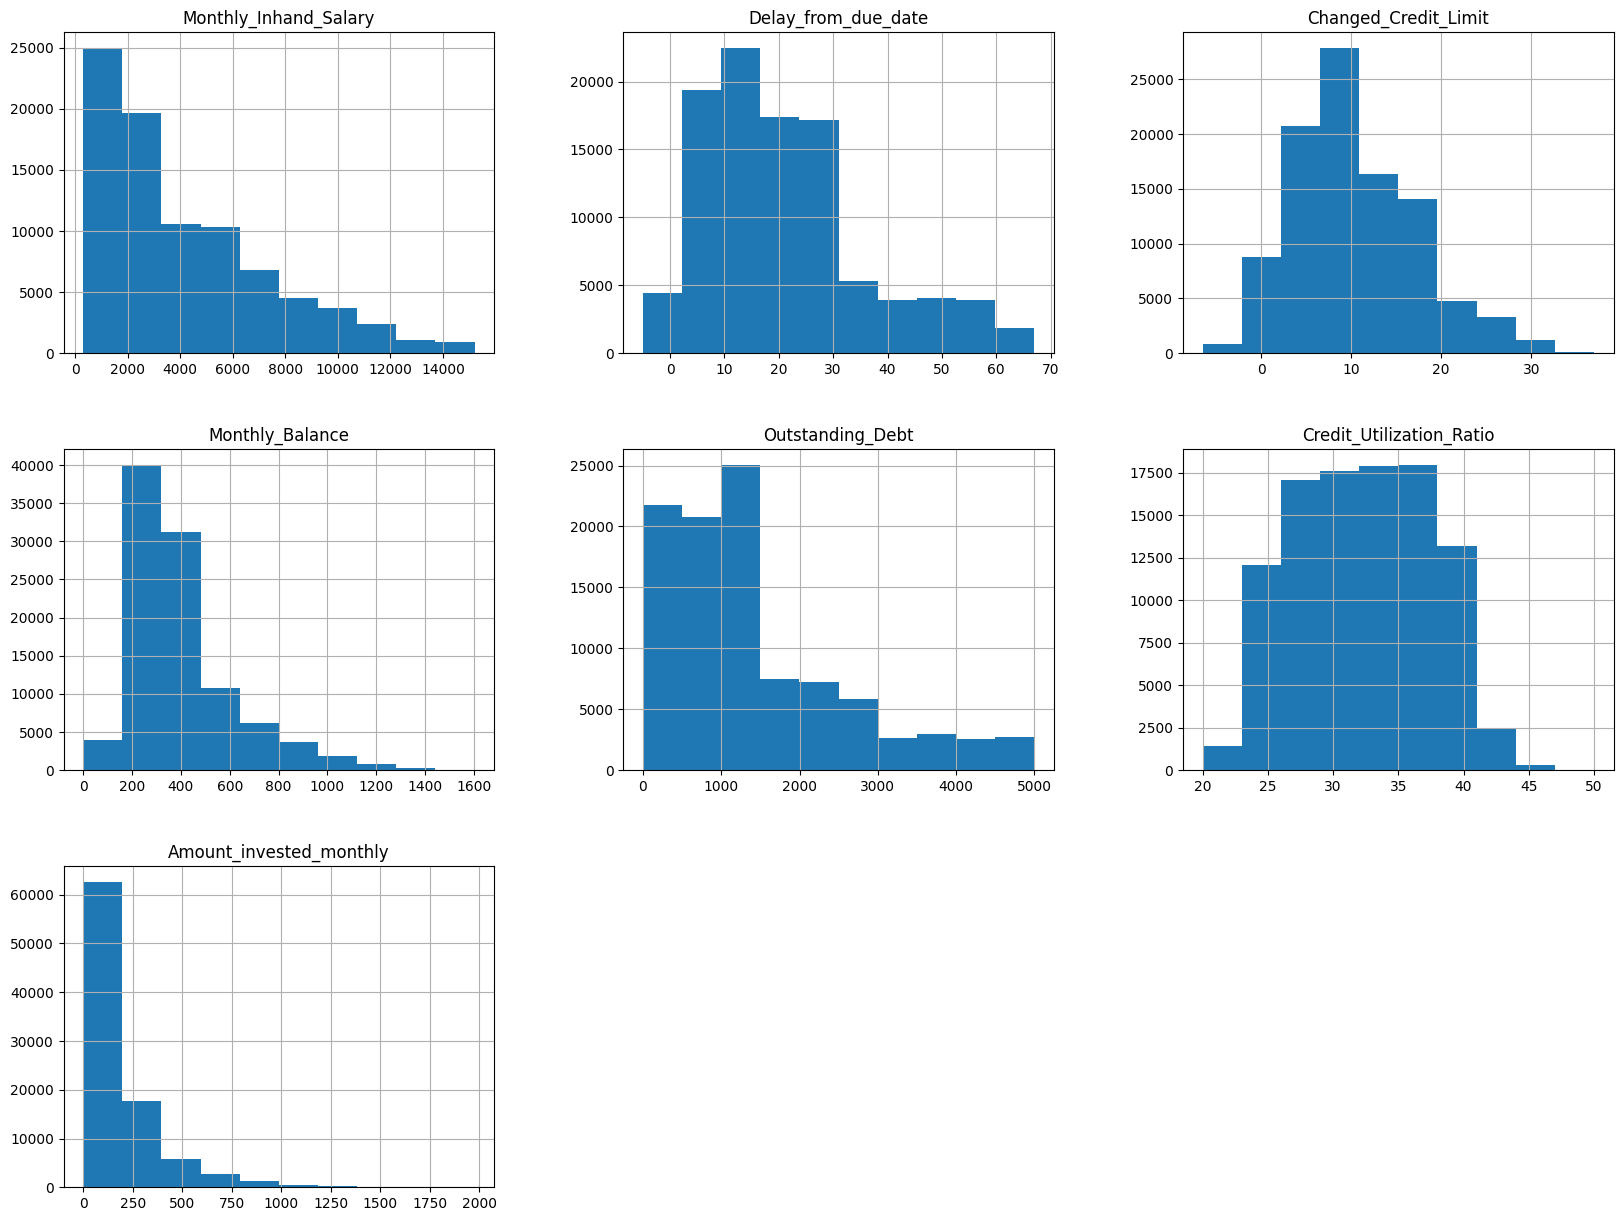

In [18]:
train[["Monthly_Inhand_Salary","Delay_from_due_date","Changed_Credit_Limit","Monthly_Balance","Outstanding_Debt","Credit_Utilization_Ratio","Amount_invested_monthly"]].hist(figsize=(20,15))

## Highly Skewed Features 

Monthly Inhand Salary
Monthly Balance
Outstanding Debt
Amount Invested Monthly
## Right-Skewed Features

Delay from Due Date
Changed Credit Limit




In [19]:
data_new=train[["Age","Annual_Income","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Num_of_Loan","Num_Credit_Inquiries","Total_EMI_per_month","Num_of_Delayed_Payment"]]


C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


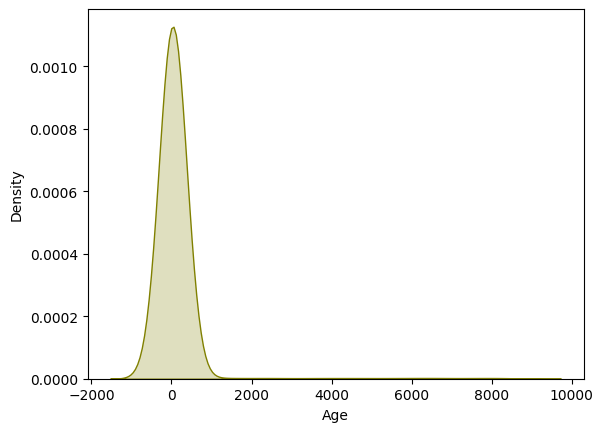

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


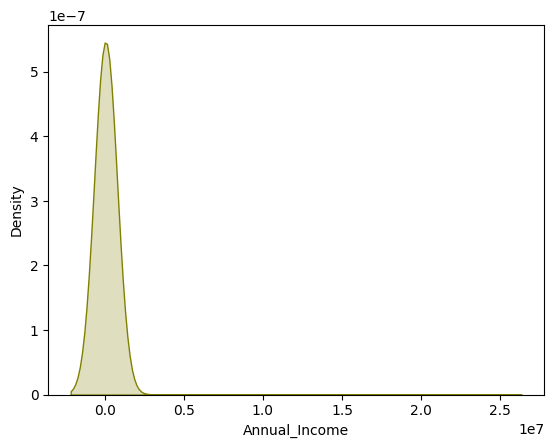

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


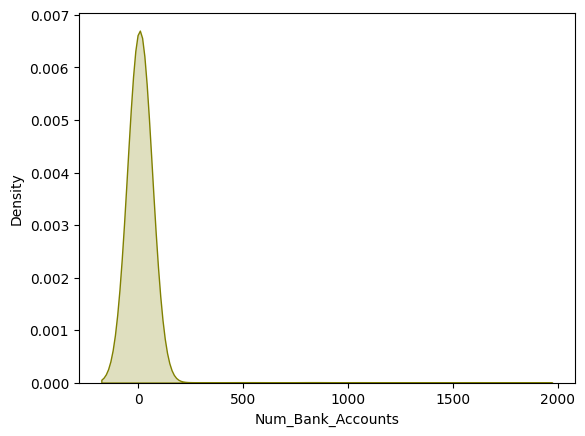

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


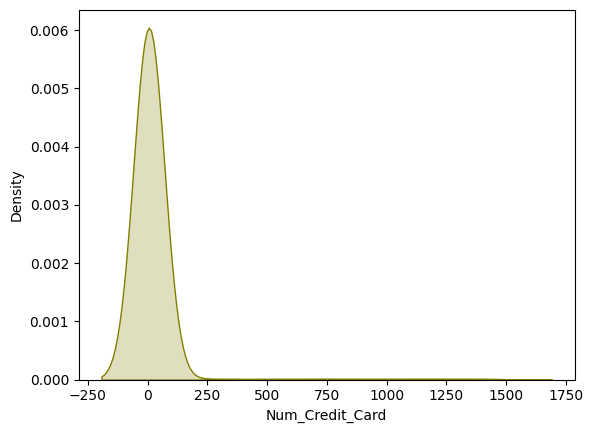

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


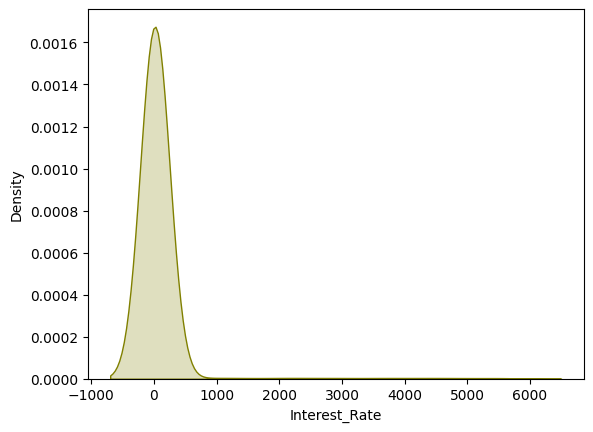

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


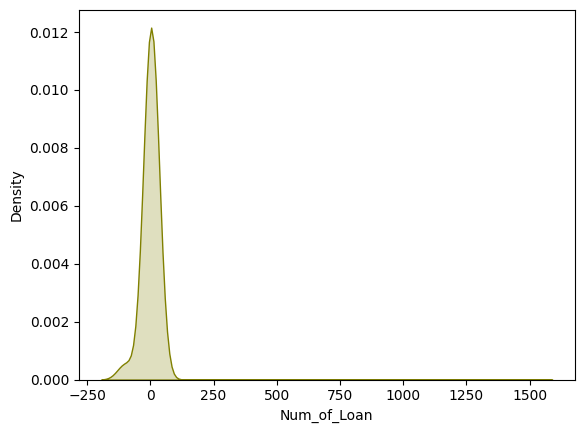

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


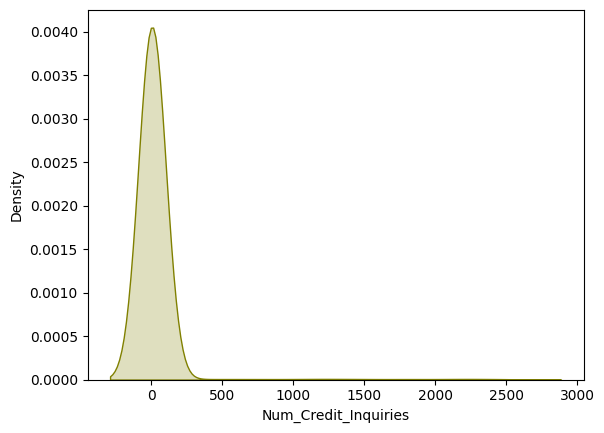

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


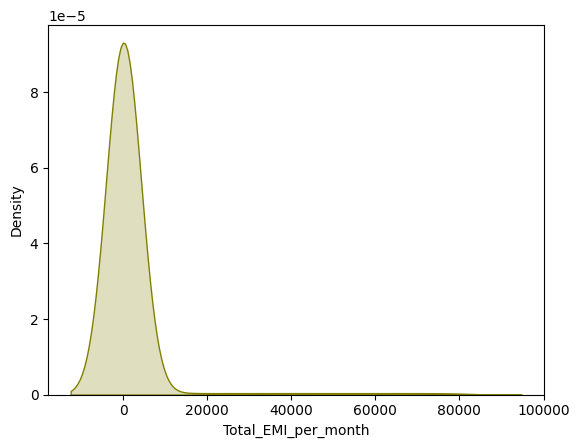

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
C:\Users\dell\AppData\Local\Temp\ipykernel_20692\600427752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")


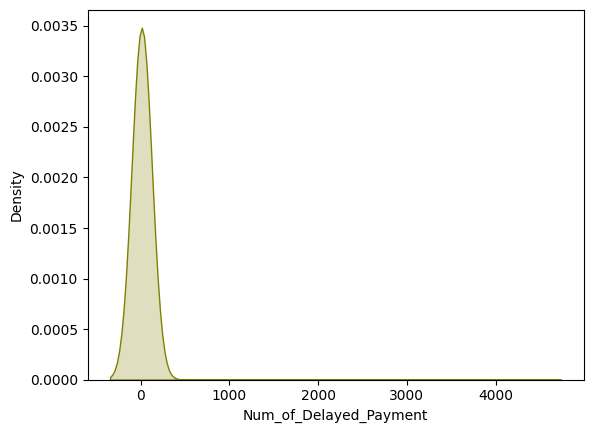

In [20]:
for i in data_new:
    sns.kdeplot(data_new[i], shade=True, bw=0.5, color="olive")
    plt.show()

<Axes: xlabel='count', ylabel='Occupation'>

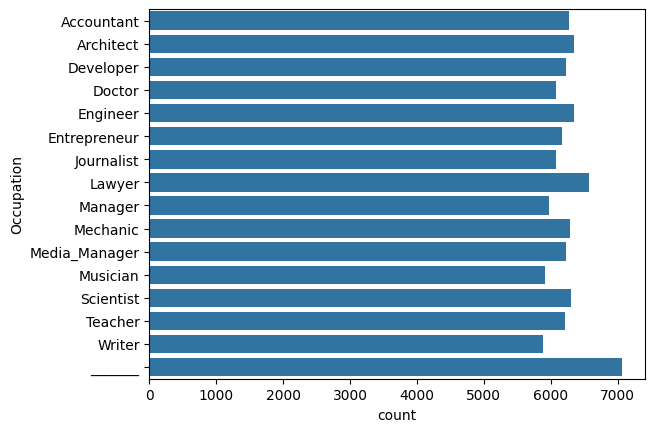

In [21]:
sns.countplot(train["Occupation"].sort_values())

<Axes: ylabel='count'>

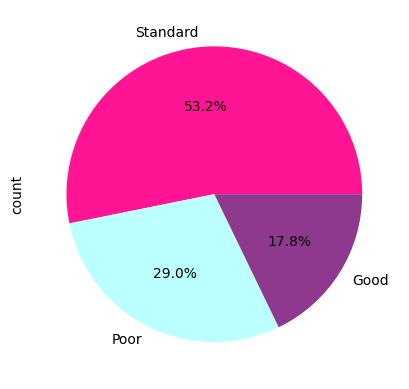

In [22]:
round(train['Credit_Score'].value_counts()/train.shape[0]*100,2).plot.pie(autopct = "%1.1f%%",
                                                            colors = ["#FF1493" , "#BBFFFF"   , '#8E388E'] )

###### may be imbalance

In [23]:
train["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

<Axes: ylabel='count'>

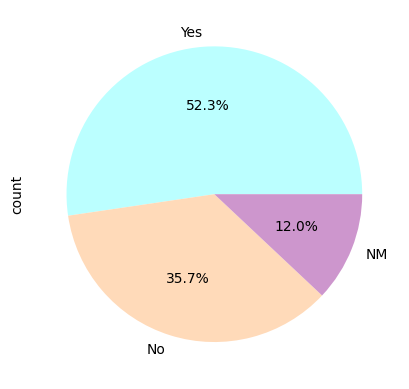

In [24]:
round(train['Payment_of_Min_Amount'].value_counts()/train.shape[0]*100,2).plot.pie(autopct = "%1.1f%%",
                                                            colors = [ "#BBFFFF" , '#FFDAB9' , '#CD96CD'] )

In [25]:
train["Type_of_Loan"].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\3386663289.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.index, y=top_10_values.values, palette="Set1")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Not Specified'),
  Text(1, 0, 'Credit-Builder Loan'),
  Text(2, 0, 'Personal Loan'),
  Text(3, 0, 'Debt Consolidation Loan'),
  Text(4, 0, 'Student Loan'),
  Text(5, 0, 'Payday Loan'),
  Text(6, 0, 'Mortgage Loan'),
  Text(7, 0, 'Auto Loan'),
  Text(8, 0, 'Home Equity Loan'),
  Text(9, 0, 'Personal Loan, and Student Loan')])

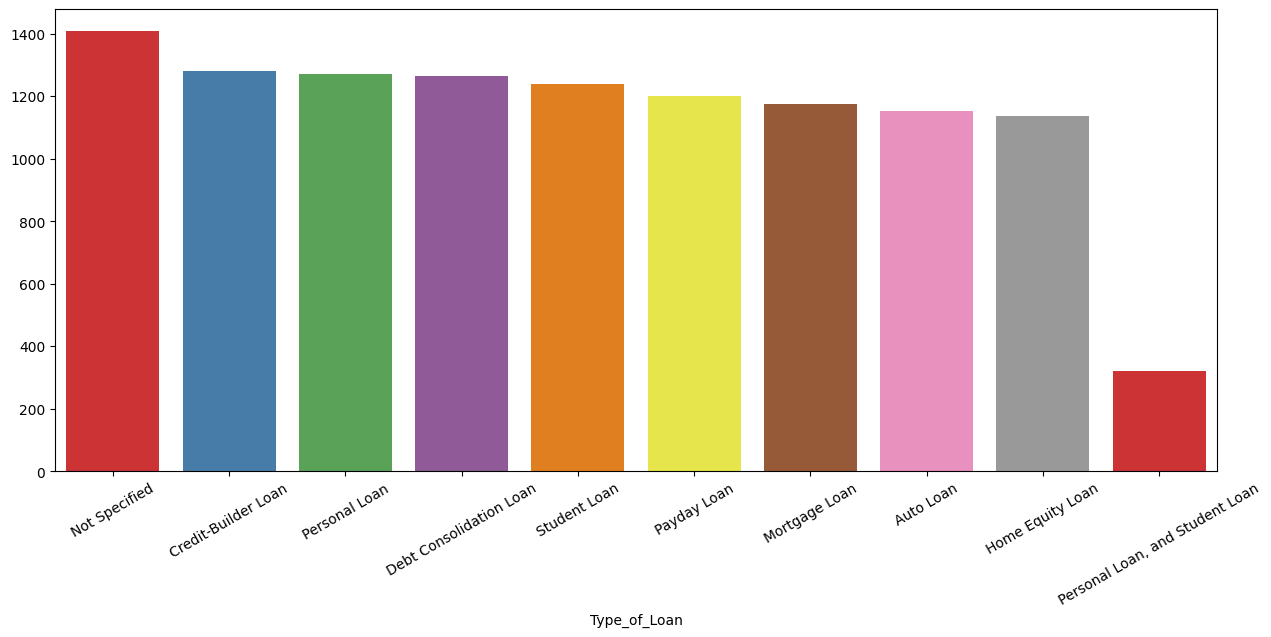

In [26]:
# Count occurrences of each unique value
top_10_values = train['Type_of_Loan'].value_counts().nlargest(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_values.index, y=top_10_values.values, palette="Set1")
plt.xticks(rotation=30)


In [27]:
train["Credit_Mix"].value_counts()


Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [28]:
train["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [29]:
train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\259249501.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["Payment_Behaviour"], palette="Set2")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'High_spent_Small_value_payments'),
  Text(1, 0, 'Low_spent_Large_value_payments'),
  Text(2, 0, 'Low_spent_Medium_value_payments'),
  Text(3, 0, 'Low_spent_Small_value_payments'),
  Text(4, 0, 'High_spent_Medium_value_payments'),
  Text(5, 0, '!@9#%8'),
  Text(6, 0, 'High_spent_Large_value_payments')])

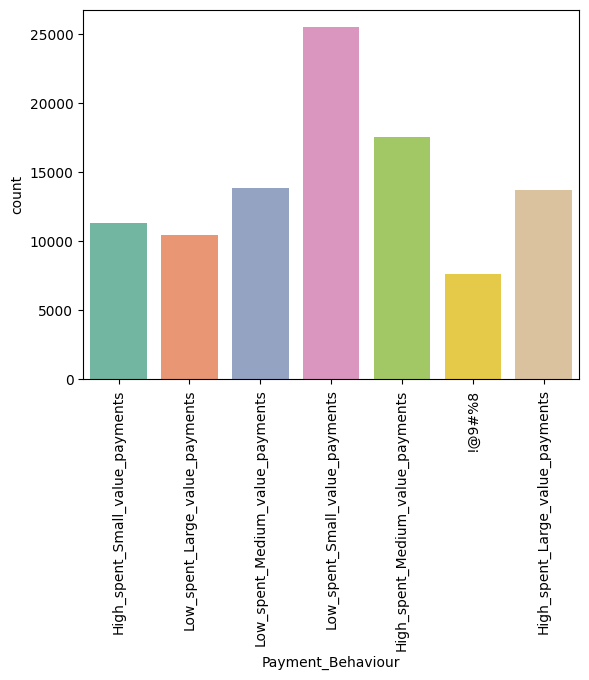

In [30]:
sns.countplot(x=train["Payment_Behaviour"], palette="Set2")
plt.xticks(rotation=90) 

In [31]:
train["Credit_History_Age"].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_20692\3616295616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.index, y=top_10_values.values, palette="Set1")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '15 Years and 11 Months'),
  Text(1, 0, '19 Years and 4 Months'),
  Text(2, 0, '19 Years and 5 Months'),
  Text(3, 0, '17 Years and 11 Months'),
  Text(4, 0, '19 Years and 3 Months'),
  Text(5, 0, '17 Years and 9 Months'),
  Text(6, 0, '15 Years and 10 Months'),
  Text(7, 0, '17 Years and 10 Months'),
  Text(8, 0, '15 Years and 9 Months'),
  Text(9, 0, '18 Years and 3 Months')])

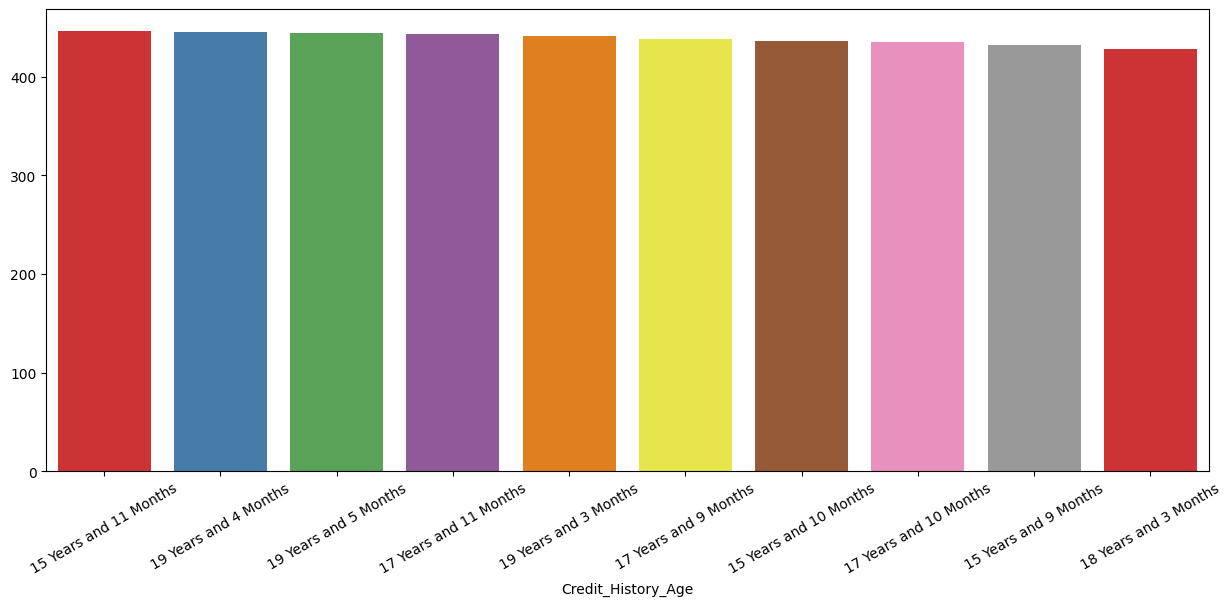

In [32]:
top_10_values = train['Credit_History_Age'].value_counts().nlargest(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_values.index, y=top_10_values.values, palette="Set1")
plt.xticks(rotation=30)

## BI & Tri

<Axes: >

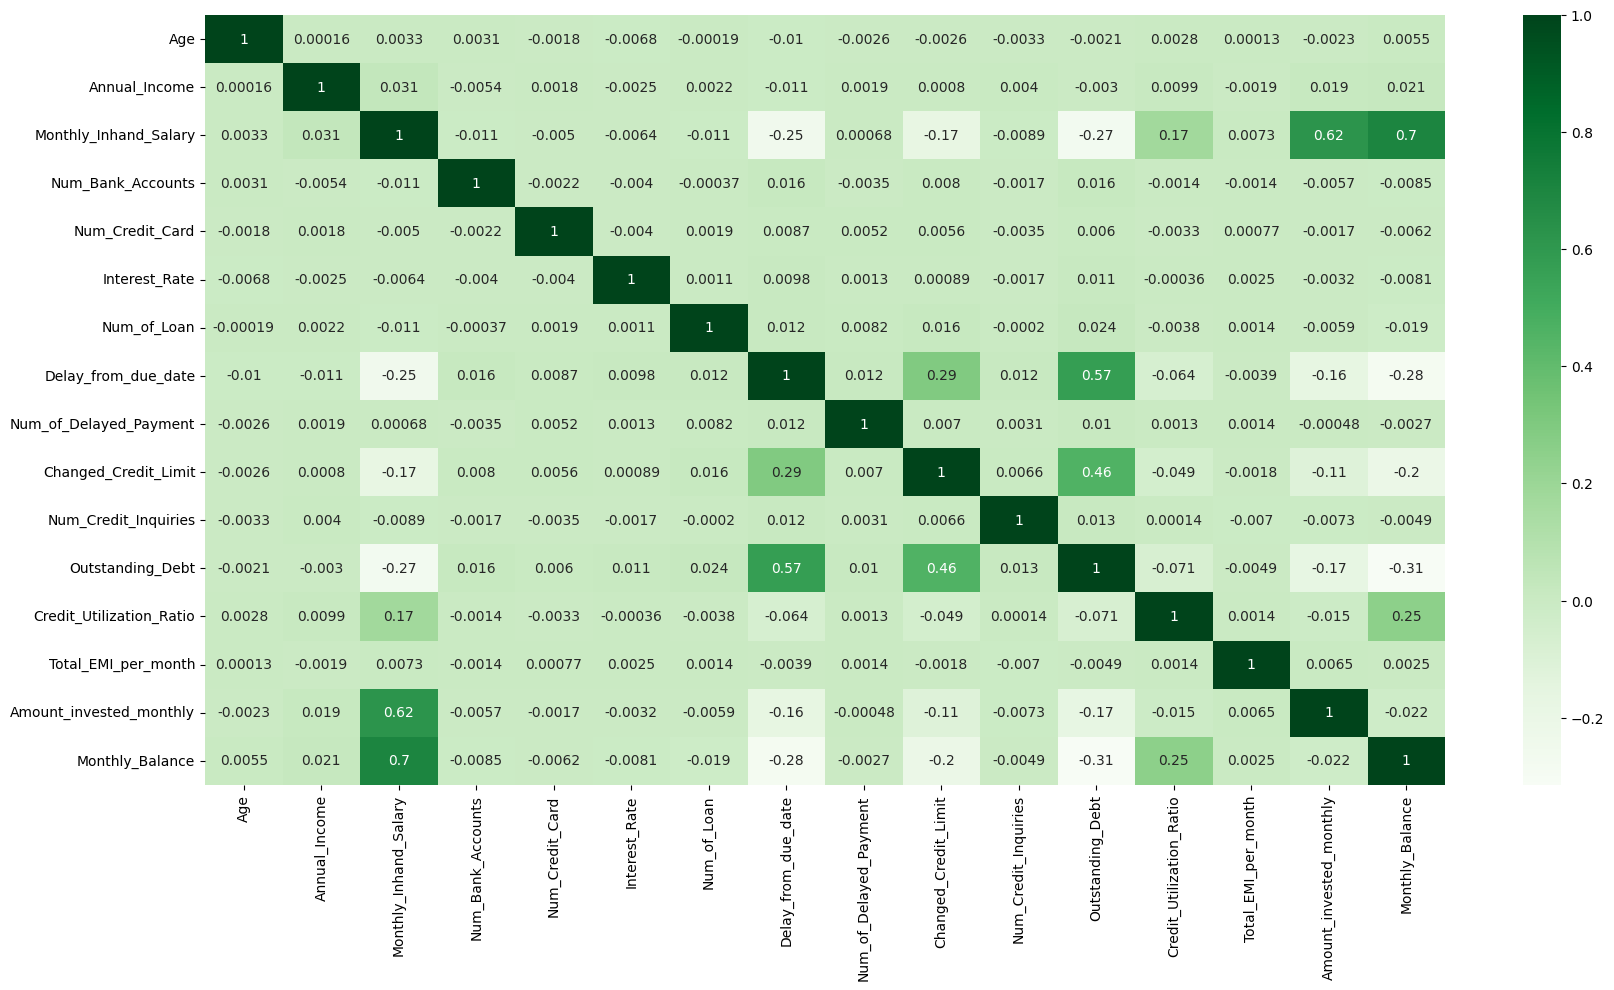

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.select_dtypes(include=['int64', 'float64']).corr(),annot = True , cmap = "Greens")


Text(0, 0.5, 'Annual Income')

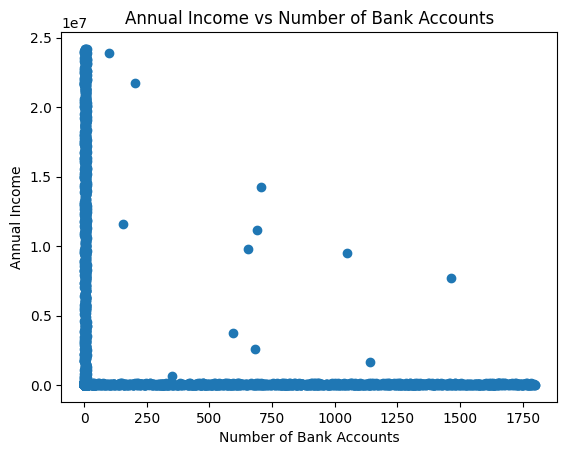

In [34]:
plt.scatter(train['Num_Bank_Accounts'],train['Annual_Income'])
plt.title('Annual Income vs Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Annual Income')

Text(0, 0.5, 'num_of_loans')

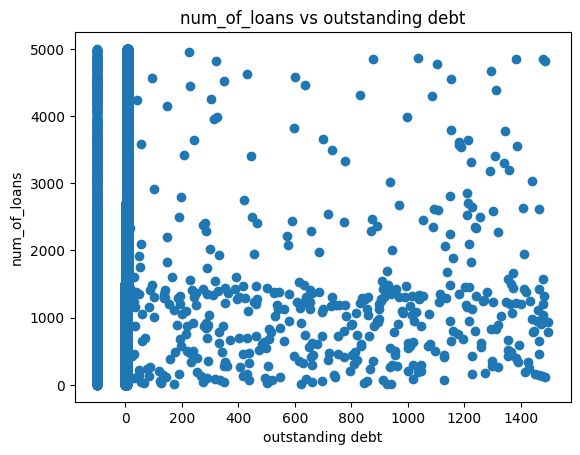

In [35]:
plt.scatter(train['Num_of_Loan'],train['Outstanding_Debt'])
plt.title('num_of_loans vs outstanding debt')
plt.xlabel('outstanding debt')
plt.ylabel('num_of_loans')

In [36]:
avg_balance_by_behavior = train.groupby('Payment_Behaviour')['Monthly_Balance'].mean().sort_values(ascending=False)
print("\nAverage Monthly Balance by Payment Behavior:")
print(avg_balance_by_behavior)


Average Monthly Balance by Payment Behavior:
Payment_Behaviour
High_spent_Large_value_payments     626.440897
High_spent_Medium_value_payments    490.250590
!@9#%8                              401.532751
High_spent_Small_value_payments     396.972252
Low_spent_Medium_value_payments     345.840987
Low_spent_Large_value_payments      344.270217
Low_spent_Small_value_payments      274.329913
Name: Monthly_Balance, dtype: float64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'High_spent_Large_value_payments'),
  Text(1, 0, 'High_spent_Medium_value_payments'),
  Text(2, 0, '!@9#%8'),
  Text(3, 0, 'High_spent_Small_value_payments'),
  Text(4, 0, 'Low_spent_Medium_value_payments'),
  Text(5, 0, 'Low_spent_Large_value_payments'),
  Text(6, 0, 'Low_spent_Small_value_payments')])

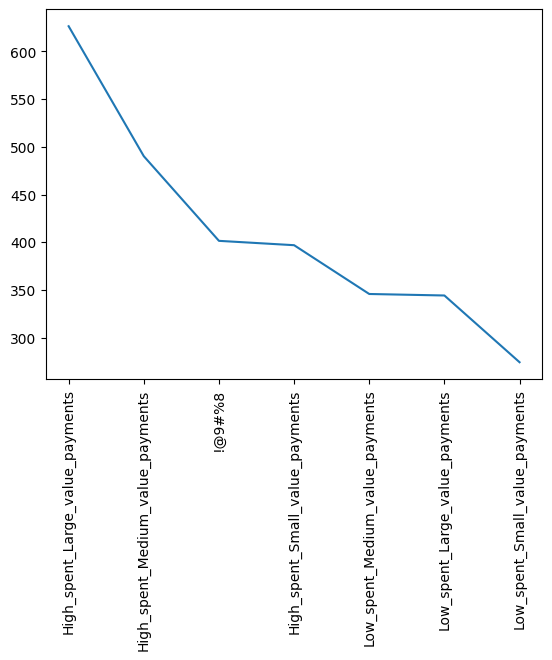

In [37]:
plt.plot(avg_balance_by_behavior)
plt.xticks(rotation=90)


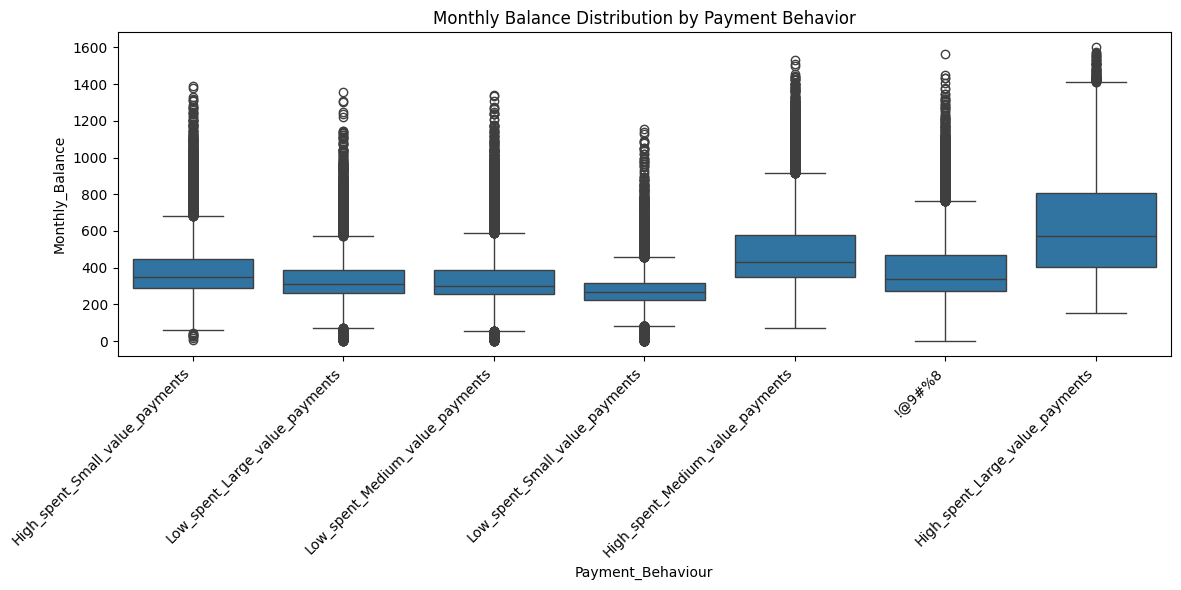

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment_Behaviour', y='Monthly_Balance', data=train)
plt.title('Monthly Balance Distribution by Payment Behavior')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
credit_EMI=train.groupby('Credit_Score')['Total_EMI_per_month'].agg(['mean', 'median', 'std']).round(2)
credit_EMI

,mean,median,std
Credit_Score,,,
Good,1477.20,64.81,8464.75
Poor,1363.93,77.71,8182.99
Standard,1399.65,65.87,8318.92


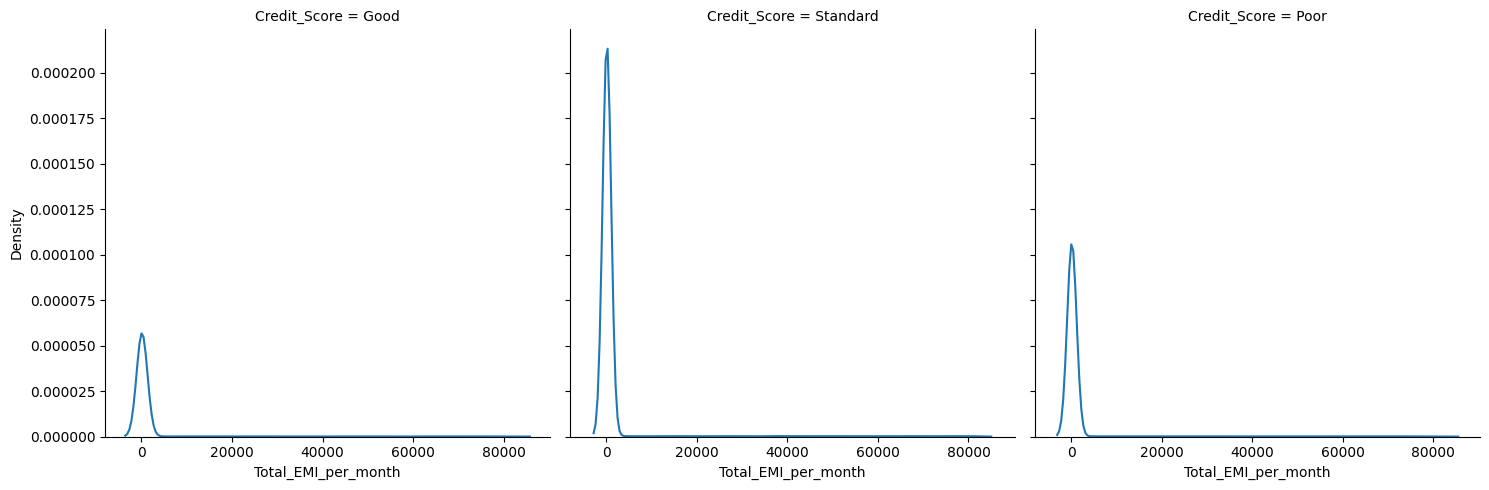

In [40]:
sns.displot(data=train, x="Total_EMI_per_month", col="Credit_Score" , kind = "kde")

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hint: It could be helpful to check `sklearn.preprocessing` module.

### deal_with_coulumns

In [41]:
train["Payment_Behaviour"].replace("!@9#%8",np.NaN, inplace=True)

print(train["Payment_Behaviour"].value_counts())

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64


In [42]:
print(train["Occupation"].value_counts())

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [43]:
train['Occupation'].replace("_______", np.nan, inplace=True)
print(train["Occupation"].value_counts())




Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [44]:
def convert_to_months(text):
    match = re.match(r"(\d+) Years? and (\d+) Months?", str(text))
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years * 12 + months
    return None

In [45]:
train["Credit_History_Age"] = train["Credit_History_Age"].apply(convert_to_months)
train["Credit_History_Age"]

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

In [46]:
train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)
train['Type_of_Loan']

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: object

In [47]:
train['Payment_of_Min_Amount'].replace("NM",np.nan,inplace=True)
train['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
Name: count, dtype: int64

In [48]:
train["Credit_Mix"]=train["Credit_Mix"].replace("_",np.nan)
train["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

In [49]:
cols = ['Age', 'Num_Bank_Accounts', 'Num_of_Loan',"Num_of_Delayed_Payment","Changed_Credit_Limit","Delay_from_due_date"]
percentile_98 = train[cols].quantile(0.98)
for col in cols:
    train.loc[(train[col] > percentile_98[col]) | (train[col] < 0), col] = np.nan
print(train[cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))

                Age  Num_Bank_Accounts   Num_of_Loan  Num_of_Delayed_Payment  \
count  92365.000000       98655.000000  90892.000000            88223.000000   
mean      33.314145           5.368466      3.534172               13.320177   
std       10.770143           2.592011      2.447488                6.117845   
min       14.000000           0.000000      0.000000                0.000000   
1%        14.000000           0.000000      0.000000                0.000000   
25%       24.000000           3.000000      2.000000                9.000000   
50%       33.000000           5.000000      3.000000               14.000000   
75%       42.000000           7.000000      5.000000               18.000000   
99%       55.000000          10.000000      9.000000               25.000000   
max       56.000000          10.000000      9.000000               25.000000   

       Changed_Credit_Limit  Delay_from_due_date  
count          94368.000000         97574.000000  
mean             

In [50]:
# Loop through all columns in the DataFrame
for col in train.select_dtypes(exclude=["object"]):
    # Check if any value in the column is less than 0
    if (train[col] < 0).any():
        print(f"Negative values found in column '{col}'. Converting to absolute values.")
        # Convert negative values to their absolute values
        train[col] = train[col].abs()
    else:
        print(f"No negative values found in column '{col}'.")

No negative values found in column 'Age'.
No negative values found in column 'Annual_Income'.
No negative values found in column 'Monthly_Inhand_Salary'.
No negative values found in column 'Num_Bank_Accounts'.
No negative values found in column 'Num_Credit_Card'.
No negative values found in column 'Interest_Rate'.
No negative values found in column 'Num_of_Loan'.
No negative values found in column 'Delay_from_due_date'.
No negative values found in column 'Num_of_Delayed_Payment'.
No negative values found in column 'Changed_Credit_Limit'.
No negative values found in column 'Num_Credit_Inquiries'.
No negative values found in column 'Outstanding_Debt'.
No negative values found in column 'Credit_Utilization_Ratio'.
No negative values found in column 'Credit_History_Age'.
No negative values found in column 'Total_EMI_per_month'.
No negative values found in column 'Amount_invested_monthly'.
No negative values found in column 'Monthly_Balance'.


In [51]:
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,NaN,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,NaN,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


### Train_Test_Split

In [52]:
X=train.drop("Credit_Score",axis=1)
Y=train["Credit_Score"]

In [53]:
x_train_valid,x_test,y_train_valid,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [54]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_valid,y_train_valid,test_size=0.2,random_state=123)

### Handle Null Values

In [55]:
x_train.select_dtypes(exclude=["object"]).columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')>

<Axes: >

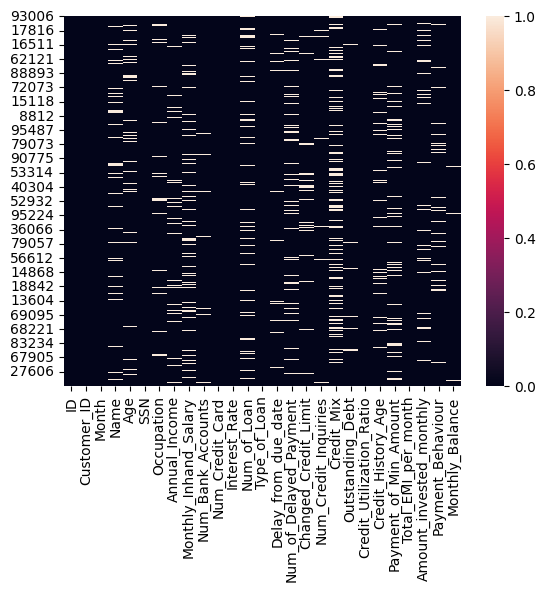

In [56]:
sns.heatmap(x_train.isnull())

In [57]:
x_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         5599
Age                          4246
SSN                             0
Occupation                   3935
Annual_Income                3956
Monthly_Inhand_Salary        8396
Num_Bank_Accounts             721
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  5234
Type_of_Loan                    0
Delay_from_due_date          1357
Num_of_Delayed_Payment       6607
Changed_Credit_Limit         3171
Num_Credit_Inquiries         1152
Credit_Mix                  11286
Outstanding_Debt              564
Credit_Utilization_Ratio        0
Credit_History_Age           5100
Payment_of_Min_Amount        6708
Total_EMI_per_month             0
Amount_invested_monthly      4974
Payment_Behaviour            4323
Monthly_Balance               678
dtype: int64

In [58]:
knn_imputer = KNNImputer(n_neighbors=5)  
numerical_cols = x_train.select_dtypes(exclude=["object"]).columns
x_train[numerical_cols] = knn_imputer.fit_transform(x_train[numerical_cols])

In [59]:
# import pandas as pd
# import numpy as np

# # Assuming x_train is your DataFrame
# # Example: x_train = pd.DataFrame(...)

# # Columns with outliers (based on summary statistics)
# outlier_columns = [
#     "Age", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", 
#     "Interest_Rate", "Num_of_Loan", "Num_of_Delayed_Payment", 
#     "Num_Credit_Inquiries", "Total_EMI_per_month"
# ]

# # Columns without outliers
# non_outlier_columns = [
#     "Monthly_Inhand_Salary", "Delay_from_due_date", "Changed_Credit_Limit", 
#     "Outstanding_Debt", "Credit_Utilization_Ratio", "Amount_invested_monthly", 
#     "Monthly_Balance","Credit_History_Age"
# ]



# # Replace outliers with median for outlier columns
# for col in outlier_columns:
#     x_train[col].fillna(x_train[col].median(), inplace=True)

# # Fill missing values with mean for non-outlier columns
# for col in non_outlier_columns:
#     x_train[col].fillna(x_train[col].mean(), inplace=True)


In [60]:
x_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         5599
Age                             0
SSN                             0
Occupation                   3935
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  11286
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount        6708
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            4323
Monthly_Balance                 0
dtype: int64

In [61]:
mode_imputer = SimpleImputer(strategy="most_frequent")
categorical_cols = ["Credit_Mix", "Payment_of_Min_Amount","Occupation","Payment_Behaviour"]
x_train[categorical_cols] = mode_imputer.fit_transform(x_train[categorical_cols])

In [62]:
x_train.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5599
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64

In [63]:
x_train.drop(["Name"],axis=1,inplace=True)

### Handle_Skweness

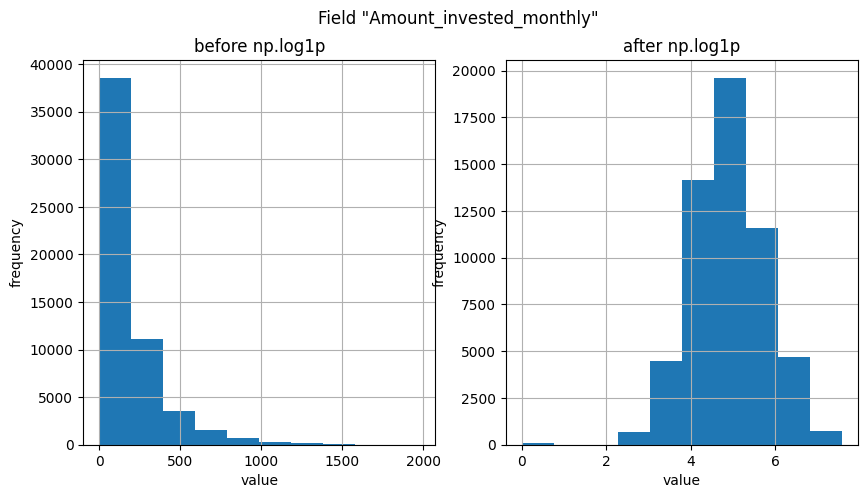

In [64]:
# Choose a field
field = "Amount_invested_monthly"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
x_train[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
x_train[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

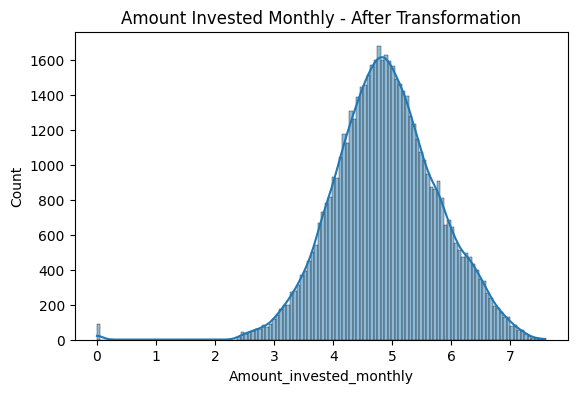

In [65]:
numeric_cols = x_train.select_dtypes(include=["number"]).columns
trf = FunctionTransformer(np.log1p, validate=True)
x_train[numeric_cols] = trf.fit_transform(x_train[numeric_cols])
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(x_train["Amount_invested_monthly"], kde=True)
plt.title("Amount Invested Monthly - After Transformation")

plt.show()

#### Drop_unwanted_columns

In [66]:
x_train.drop(columns=["ID", "Customer_ID", "SSN","Type_of_Loan"],inplace=True)

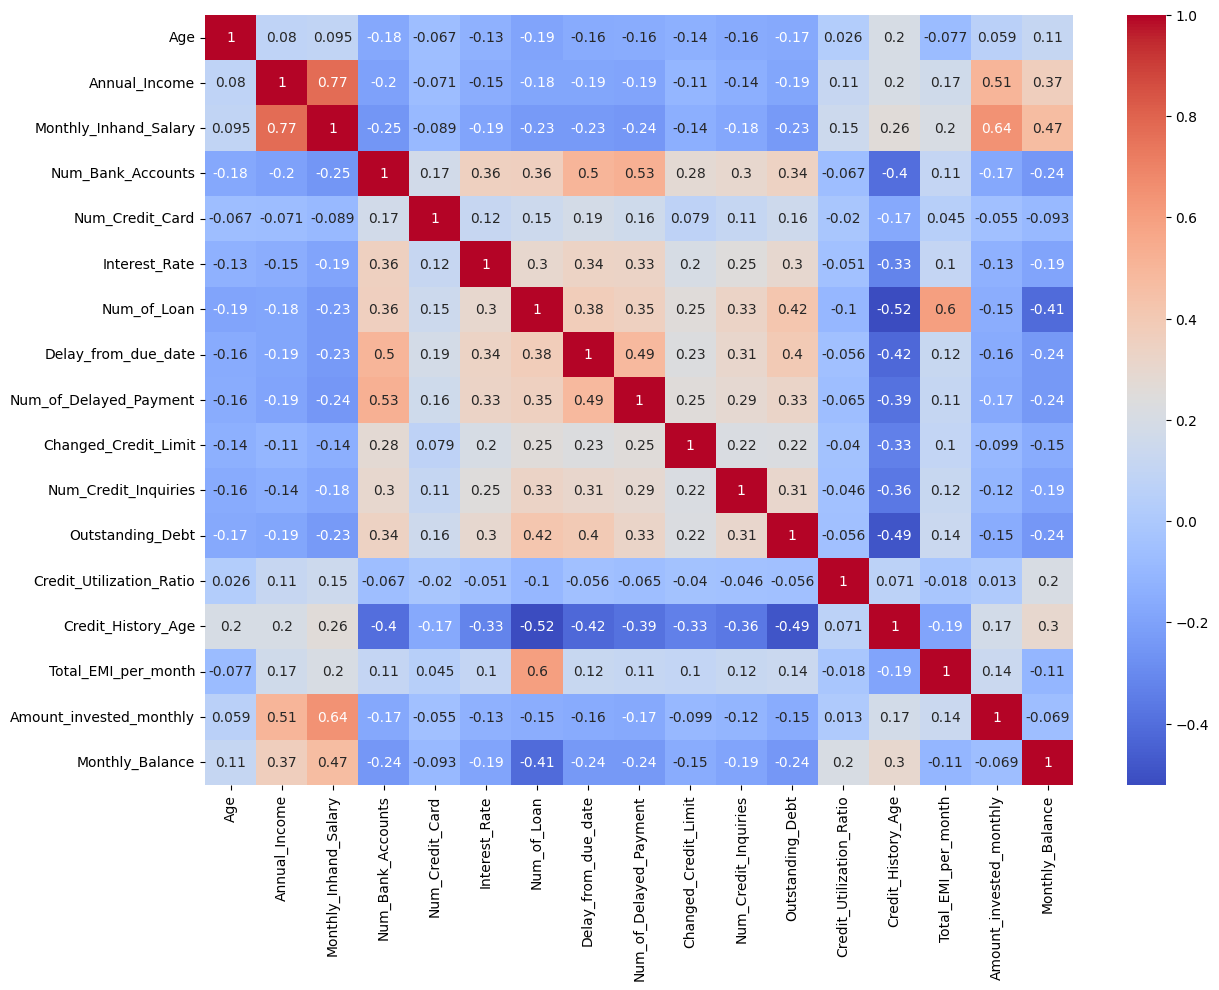

In [67]:
corr_matrix = x_train.select_dtypes(include=['number']).corr()


plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [68]:

x_train_vif = x_train.select_dtypes(include=[np.number])


vif_data = pd.DataFrame()
vif_data["Feature"] = x_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)


                     Feature         VIF
2      Monthly_Inhand_Salary  503.667758
12  Credit_Utilization_Ratio  332.880418
1              Annual_Income  286.430694
16           Monthly_Balance  260.989614
0                        Age  109.681822
13        Credit_History_Age  106.520602
15   Amount_invested_monthly   82.264906
11          Outstanding_Debt   56.767347
8     Num_of_Delayed_Payment   29.337939
7        Delay_from_due_date   23.041559
3          Num_Bank_Accounts   18.246493
9       Changed_Credit_Limit   14.962045
6                Num_of_Loan   14.483386
14       Total_EMI_per_month   10.531719
5              Interest_Rate   10.349160
4            Num_Credit_Card    7.676218
10      Num_Credit_Inquiries    5.391063


In [69]:
columns_to_drop = [
    "Monthly_Inhand_Salary", "Credit_Utilization_Ratio", "Annual_Income", 
    "Monthly_Balance"]


# Drop the columns from the DataFrame
x_train.drop(columns=columns_to_drop, inplace=True)

In [70]:

Numerical_columns = x_train.select_dtypes(exclude=["object"]).columns
print(Numerical_columns)

Index(['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly'],
      dtype='object')


#### Encoding

In [71]:

categorical_columns = x_train.select_dtypes(include=["object"]).columns
print(categorical_columns)

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')


### one_hot_encoding

In [72]:
# Features to be ordinally encoded
ordinal_features = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Features to be one-hot encoded
onehot_features = ['Occupation',"Month"]

In [73]:


# Define ordinal categories
credit_mix_order = ['Bad', 'Standard', 'Good']  
payment_min_order = ['NM', 'Yes', 'No']  
payment_behaviour_order = [
    'High_spent_Small_value_payments', 
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'High_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Large_value_payments',
    'Other'  # Added missing category
]

# Features to be ordinally and one-hot encoded
ordinal_features = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
onehot_features = ['Occupation', "Month"]

# Initialize encoders
ordinal_encoder = OrdinalEncoder(categories=[credit_mix_order, 
                                             payment_min_order,
                                             payment_behaviour_order])

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply ordinal encoding
x_train_ordinal = ordinal_encoder.fit_transform(x_train[ordinal_features])
ordinal_df = pd.DataFrame(x_train_ordinal, columns=ordinal_features, index=x_train.index)

# Apply one-hot encoding
x_train_onehot = onehot_encoder.fit_transform(x_train[onehot_features])
onehot_columns = onehot_encoder.get_feature_names_out(onehot_features)
onehot_df = pd.DataFrame(x_train_onehot, columns=onehot_columns, index=x_train.index)

# Combine all features
x_train = x_train.drop(columns=ordinal_features + onehot_features)
x_train = pd.concat([x_train, ordinal_df, onehot_df], axis=1)

# Display updated DataFrame
print(x_train.head())


            Age  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
93006  4.025352           2.197225         2.079442       2.890372   
77198  4.007333           0.693147         1.609438       0.693147   
51797  3.583519           1.791759         1.791759       2.197225   
11127  2.833213           1.791759         2.397895       3.332205   
72088  3.951244           0.000000         1.386294       2.302585   

       Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
93006     0.000000             2.397895                2.302585   
77198     0.693147             2.564949                2.079442   
51797     1.386294             2.397895                2.302585   
11127     1.791759             2.995732                2.844909   
72088     1.386294             2.079442                1.945910   

       Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  ...  \
93006              2.547099              1.098612          6.679009  ...   
77198              1.713

#### label_encoding

In [74]:
y_train

93006        Good
77198        Good
51797        Good
11127        Poor
72088    Standard
           ...   
32926    Standard
23038        Good
55168    Standard
73436    Standard
24758    Standard
Name: Credit_Score, Length: 56000, dtype: object

In [75]:

print("Type of y_train:", type(y_train))
if isinstance(y_train, pd.Series):
    print("Target variable name:", y_train.name)
    if y_train.name == "Credit_Score":
        lb = LabelEncoder()
        y_train = lb.fit_transform(y_train)  
        print("Encoding successful!")
    else:
        print("Error: 'Credit_Score' is not the name of the target variable!")

else:
    print("Error: y_train is not a Pandas Series! Check dataset splitting.")


Type of y_train: <class 'pandas.core.series.Series'>
Target variable name: Credit_Score
Encoding successful!


In [76]:
y_train

array([0, 0, 0, ..., 2, 2, 2])

### Scaling

In [77]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56000 entries, 93006 to 24758
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       56000 non-null  float64
 1   Num_Bank_Accounts         56000 non-null  float64
 2   Num_Credit_Card           56000 non-null  float64
 3   Interest_Rate             56000 non-null  float64
 4   Num_of_Loan               56000 non-null  float64
 5   Delay_from_due_date       56000 non-null  float64
 6   Num_of_Delayed_Payment    56000 non-null  float64
 7   Changed_Credit_Limit      56000 non-null  float64
 8   Num_Credit_Inquiries      56000 non-null  float64
 9   Outstanding_Debt          56000 non-null  float64
 10  Credit_History_Age        56000 non-null  float64
 11  Total_EMI_per_month       56000 non-null  float64
 12  Amount_invested_monthly   56000 non-null  float64
 13  Credit_Mix                56000 non-null  float64
 14  Payment

In [78]:
x_train.isnull().sum()

Age                         0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_History_Age          0
Total_EMI_per_month         0
Amount_invested_monthly     0
Credit_Mix                  0
Payment_of_Min_Amount       0
Payment_Behaviour           0
Occupation_Accountant       0
Occupation_Architect        0
Occupation_Developer        0
Occupation_Doctor           0
Occupation_Engineer         0
Occupation_Entrepreneur     0
Occupation_Journalist       0
Occupation_Lawyer           0
Occupation_Manager          0
Occupation_Mechanic         0
Occupation_Media_Manager    0
Occupation_Musician         0
Occupation_Scientist        0
Occupation_Teacher          0
Occupation_Writer           0
Month_April                 0
Month_August                0
Month_Febr

In [79]:
x_train.describe()

,Age,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,...,Occupation_Teacher,Occupation_Writer,Month_April,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,3.485196,1.732411,1.925065,2.652969,1.337357,2.827162,2.527097,2.246997,1.795116,6.850794,...,0.061196,0.059750,0.126554,0.124089,0.123446,0.124089,0.126054,0.125714,0.125161,0.124893
std,0.325710,0.551740,0.767594,0.990347,0.635377,0.779233,0.605712,0.648747,0.990904,1.079688,...,0.239692,0.237025,0.332475,0.329686,0.328952,0.329686,0.331913,0.331530,0.330904,0.330600
min,2.708050,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.207014,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.258097,1.386294,1.609438,2.197225,1.098612,2.397895,2.302585,1.894617,1.386294,6.348024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.526361,1.916923,1.791759,2.708050,1.386294,2.944439,2.694627,2.343727,1.945910,7.060030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.737670,2.079442,2.079442,3.044522,1.791759,3.367296,2.944439,2.748648,2.302585,7.576205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.043051,2.397895,7.313220,8.663715,2.302585,4.094345,3.258097,3.341801,7.862497,8.517007,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
scaler = StandardScaler() 
x_train[Numerical_columns]= scaler.fit_transform(x_train[Numerical_columns]) 


## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [ ]:
# KNN
x_valid[numerical_cols] = knn_imputer.transform(x_valid[numerical_cols])

# Mode
x_valid[categorical_cols] = mode_imputer.transform(x_valid[categorical_cols])

#transform
# numeric_cols = x_valid["Monthly_Inhand_Salary","Monthly Balance","Outstanding Debt","Amount Invested Monthly"]
x_valid[numeric_cols] = trf.transform(x_valid[numeric_cols])



## drop coulumns
x_valid.drop(columns=["ID", "Customer_ID", "SSN","Type_of_Loan"],inplace=True)
columns_to_drop = [
    "Monthly_Inhand_Salary", "Credit_Utilization_Ratio", "Annual_Income", 
    "Monthly_Balance"
]


x_valid.drop(columns=columns_to_drop, inplace=True)



# Apply ordinal encoding
x_valid_ordinal = ordinal_encoder.transform(x_valid[ordinal_features])
ordinal_df = pd.DataFrame(x_valid_ordinal, columns=ordinal_features, index=x_valid.index)

# Apply one-hot encoding
x_valid_onehot = onehot_encoder.transform(x_valid[onehot_features])
onehot_columns = onehot_encoder.get_feature_names_out(onehot_features)
onehot_df = pd.DataFrame(x_valid_onehot, columns=onehot_columns, index=x_valid.index)

# Combine all features
x_valid = x_valid.drop(columns=ordinal_features + onehot_features)
x_valid = pd.concat([x_valid, ordinal_df, onehot_df], axis=1)
print(x_valid)




                     Name       Age  Num_Bank_Accounts  Num_Credit_Card  \
10740  Sumeet Chatterjeen  3.761200           1.386294         1.386294   
65057            Manuelar  3.828641           2.197225         2.079442   
1645              Camposg  3.850148           1.386294         1.609438   
82810       Jessica Wohlw  3.135494           1.791759         1.098612   
76143                 NaN  3.332205           1.945910         1.098612   
...                   ...       ...                ...              ...   
3502         Niu Shupingq  3.135494           0.693147         1.945910   
12255                 NaN  3.295837           1.386294         1.791759   
7264               Lauraf  2.890372           2.302585         2.079442   
79915          Hendersonf  3.850148           2.197225         2.397895   
79068             Lawderd  3.295837           1.945910         2.079442   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
10740       2.302585     1.945910        

In [82]:
x_valid.drop(["Name"],axis=1,inplace=True)

In [83]:
#scaling
x_valid[Numerical_columns]= scaler.transform(x_valid[Numerical_columns])

In [84]:
# label encoding

print("Type of y_train:", type(y_valid))
if isinstance(y_valid, pd.Series):
    print("Target variable name:", y_valid.name)
    if y_valid.name == "Credit_Score":
        y_valid = lb.transform(y_valid)  
        print("Encoding successful!")
    else:
        print("Error: 'Credit_Score' is not the name of the target variable!")

else:
    print("Error: y_train is not a Pandas Series! Check dataset splitting.")

Type of y_train: <class 'pandas.core.series.Series'>
Target variable name: Credit_Score
Encoding successful!


In [85]:
# KNN
x_test[numerical_cols] = knn_imputer.transform(x_test[numerical_cols])

# Mode
x_test[categorical_cols] = mode_imputer.transform(x_test[categorical_cols])

#transform
# numeric_cols = x_test["Monthly_Inhand_Salary","Monthly Balance","Outstanding Debt","Amount Invested Monthly"]

x_test[numeric_cols] = trf.transform(x_test[numeric_cols])



## drop coulumns
x_test.drop(columns=["ID", "Customer_ID", "Name","SSN","Type_of_Loan"],inplace=True)
columns_to_drop = [
    "Monthly_Inhand_Salary", "Credit_Utilization_Ratio", "Annual_Income", 
    "Monthly_Balance"
]


x_test.drop(columns=columns_to_drop, inplace=True)



# Apply ordinal encoding
x_test_ordinal = ordinal_encoder.transform(x_test[ordinal_features])
ordinal_df = pd.DataFrame(x_test_ordinal, columns=ordinal_features, index=x_test.index)

# Apply one-hot encoding
x_test_onehot = onehot_encoder.transform(x_test[onehot_features])
onehot_columns = onehot_encoder.get_feature_names_out(onehot_features)
onehot_df = pd.DataFrame(x_test_onehot, columns=onehot_columns, index=x_test.index)

# Combine all features
x_test = x_test.drop(columns=ordinal_features + onehot_features)
x_test = pd.concat([x_test, ordinal_df, onehot_df], axis=1)
print(x_test)



            Age  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
42083  3.178054           1.791759         1.945910       1.386294   
71825  3.837299           0.000000         0.693147       1.098612   
99535  3.828641           2.397895         2.197225       3.367296   
47879  3.496508           2.397895         2.197225       3.178054   
36734  3.555348           2.197225         1.386294       3.401197   
...         ...                ...              ...            ...   
82284  3.332205           1.098612         1.609438       0.693147   
68687  3.977811           1.609438         1.945910       2.564949   
76311  3.367296           1.945910         1.791759       2.890372   
69186  3.295837           2.079442         2.197225       2.890372   
66276  3.663562           2.397895         1.791759       2.944439   

       Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
42083     0.693147             0.693147                2.219203   
71825     0.000000       

In [86]:
print("Type of y_train:", type(y_test))
if isinstance(y_test, pd.Series):
    print("Target variable name:", y_test.name)
    if y_test.name == "Credit_Score":
        y_test = lb.fit_transform(y_test)  
        print("Encoding successful!")
    else:
        print("Error: 'Credit_Score' is not the name of the target variable!")

else:
    print("Error: y_train is not a Pandas Series! Check dataset splitting.")

Type of y_train: <class 'pandas.core.series.Series'>
Target variable name: Credit_Score
Encoding successful!


In [87]:
#scaling
x_test[Numerical_columns]= scaler.transform(x_test[Numerical_columns])

----------------------

# `05` DecisionTree

Using `sklearn` implementation of SVM to model the data.



- `random_state` $= 1234$

In [88]:
model = DecisionTreeClassifier(criterion='gini',splitter='best')
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [89]:
model.score(x_train,y_train)

1.0

In [90]:
model.score(x_valid, y_valid)

0.6811428571428572

In [91]:
model.feature_importances_

array([0.04424747, 0.03793625, 0.03521848, 0.0765207 , 0.02210025,
       0.05537645, 0.0444585 , 0.06775573, 0.03320962, 0.18115828,
       0.06884979, 0.05233956, 0.05939374, 0.08606517, 0.0029917 ,
       0.02098929, 0.00360403, 0.00582264, 0.00464279, 0.00398787,
       0.00361597, 0.00347432, 0.00389663, 0.00415091, 0.00401492,
       0.00299987, 0.00354454, 0.00438279, 0.00462711, 0.00393996,
       0.00328867, 0.00643119, 0.00592538, 0.0064569 , 0.00664465,
       0.00715615, 0.00503601, 0.00802468, 0.00572104])

In [92]:
model.classes_

array([0, 1, 2])

In [93]:
model.get_depth()

46

In [94]:
model1 = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=10)
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [95]:
model1.score(x_train,y_train)

0.7354642857142857

In [96]:
model1.score(x_valid, y_valid)

0.7073571428571429

In [97]:
model2 = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=12)
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [98]:
model2.score(x_train,y_train)

0.7496964285714286

In [99]:
model2.score(x_valid,y_valid)

0.7007857142857142

In [100]:
model2.decision_path(x_train, check_input=True)

<56000x2269 sparse matrix of type '<class 'numpy.int64'>'
	with 716662 stored elements in Compressed Sparse Row format>

In [101]:
model3= DecisionTreeClassifier(criterion='entropy',max_features=20,max_depth=12)
model3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=20)

In [102]:
model3.score(x_train,y_train)

0.7381964285714285

In [103]:
model3.score(x_valid,y_valid)

0.6947142857142857

In [104]:
model3.feature_names_in_

array(['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic',
       'Occupation_Media_Manager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Month_April', 'Month_August', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May'],
      dtype=object)

In [105]:
model4= DecisionTreeClassifier(criterion='entropy',max_features=15,max_depth=12)
model4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=15)

In [106]:
model4.feature_names_in_

array(['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic',
       'Occupation_Media_Manager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Month_April', 'Month_August', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May'],
      dtype=object)

In [107]:
model4.score(x_train,y_train)

0.7396964285714286

In [108]:
model4.score(x_valid,y_valid)

0.6975

In [109]:
model4.apply(x_train)

array([260,  91, 260, ..., 264, 260, 291], dtype=int64)

In [110]:
model4.cost_complexity_pruning_path(x_train, y_train, sample_weight=None)

{'ccp_alphas': array([0.00000000e+00, 1.34801340e-05, 1.34801340e-05, 1.60106599e-05,
        2.22341517e-05, 2.45972098e-05, 2.45972098e-05, 2.45972098e-05,
        2.45972098e-05, 2.47646776e-05, 2.58840211e-05, 2.83813278e-05,
        2.87435799e-05, 2.89742187e-05, 3.05268919e-05, 3.05268919e-05,
        3.07266019e-05, 3.22289328e-05, 3.22289328e-05, 3.39309737e-05,
        3.39309737e-05, 3.39309737e-05, 3.39309737e-05, 3.39309737e-05,
        3.44784777e-05, 3.45547935e-05, 3.45547935e-05, 3.48226297e-05,
        3.48226297e-05, 3.57142857e-05, 3.57142857e-05, 3.57142857e-05,
        3.57142857e-05, 3.57142857e-05, 3.57142857e-05, 3.57142857e-05,
        3.57142857e-05, 3.57142857e-05, 3.57142857e-05, 3.57142857e-05,
        3.57142857e-05, 3.57142857e-05, 3.57142857e-05, 3.61265640e-05,
        3.64614996e-05, 3.69795487e-05, 3.73856152e-05, 3.74975977e-05,
        3.77777022e-05, 3.78805203e-05, 3.82448116e-05, 3.82448116e-05,
        3.86671182e-05, 3.86677728e-05, 3.86764440

In [111]:
model4.get_n_leaves()


1208

In [112]:
model4.predict(x_valid)

array([2, 2, 0, ..., 1, 1, 1])

In [113]:
y_valid

array([2, 2, 0, ..., 1, 1, 2])

In [114]:
model4.predict_log_proba(x_valid)

c:\Python311\Lib\site-packages\sklearn\tree\_classes.py:1074: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[-2.16097061, -2.17208183, -0.26026589],
       [-5.47994424, -6.17309142, -0.00627398],
       [-0.58336361, -2.90481718, -0.94875466],
       ...,
       [       -inf,  0.        ,        -inf],
       [       -inf, -0.24561641, -1.5242801 ],
       [       -inf, -0.28525194, -1.3936204 ]])

In [115]:
model4.predict_proba(x_valid, check_input=True)


array([[0.11521324, 0.11394017, 0.77084659],
       [0.00416956, 0.00208478, 0.99374566],
       [0.55801825, 0.0547588 , 0.38722295],
       ...,
       [0.        , 1.        , 0.        ],
       [0.        , 0.78222222, 0.21777778],
       [0.        , 0.75182482, 0.24817518]])

In [123]:
model5=DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=1000)

In [125]:
model5.fit(x_train,y_train)

DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=1000)

In [126]:
model5.score(x_train,y_train)

0.6563928571428571

In [127]:
model5.score(x_valid,y_valid)

0.6550714285714285

In [128]:
model6=DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=5000)

In [129]:
model6.fit(x_train,y_train)

DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=5000)

In [130]:
model6.score(x_train,y_train)

0.6331964285714285

In [131]:
model6.score(x_valid,y_valid)

0.6362142857142857

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [ ]:
print(classification_report(y_valid, model.predict(x_valid)))


              precision    recall  f1-score   support

           0       0.59      0.56      0.58      2535
           1       0.67      0.66      0.67      4103
           2       0.71      0.73      0.72      7362

    accuracy                           0.68     14000
   macro avg       0.66      0.65      0.66     14000
weighted avg       0.68      0.68      0.68     14000



In [118]:
print(classification_report(y_valid, model1.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      2535
           1       0.75      0.67      0.70      4103
           2       0.73      0.77      0.75      7362

    accuracy                           0.71     14000
   macro avg       0.69      0.68      0.68     14000
weighted avg       0.71      0.71      0.71     14000



In [119]:
print(classification_report(y_valid, model4.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58      2535
           1       0.73      0.66      0.69      4103
           2       0.73      0.75      0.74      7362

    accuracy                           0.70     14000
   macro avg       0.67      0.67      0.67     14000
weighted avg       0.70      0.70      0.70     14000



In [120]:
print(classification_report(y_valid, model3.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59      2535
           1       0.73      0.65      0.68      4103
           2       0.73      0.75      0.74      7362

    accuracy                           0.69     14000
   macro avg       0.67      0.67      0.67     14000
weighted avg       0.70      0.69      0.70     14000



In [121]:
print(classification_report(y_valid, model2.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      2535
           1       0.73      0.65      0.69      4103
           2       0.72      0.77      0.74      7362

    accuracy                           0.70     14000
   macro avg       0.68      0.67      0.67     14000
weighted avg       0.70      0.70      0.70     14000



## `iv` Tuning Hyperparameters

1. Try different `C` values and evaluate. What is the best panalty value?
2. Try training the model while using the `class_weight` parameter and compare the results. Did it affect the model evaluation?
3. You can tune other parameters as you see fit (but make sure you elaborate your reasoning).

`Note:` Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [134]:
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random'],  
    'max_depth': [15, 10, 8],  
    'min_samples_split': [1000, 3000, 800], 
    'min_samples_leaf': [1000, 5000, 500], 
    'max_features': [None, 'sqrt', 'log2']  
}

In [135]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 10, 8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1000, 5000, 500],
                         'min_samples_split': [1000, 3000, 800],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [137]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_valid, y_valid)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 500, 'min_samples_split': 1000, 'splitter': 'best'}
Best Accuracy: 0.6826607142857142
Test Accuracy: 0.6826428571428571


------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [138]:
print(classification_report(y_test, model2.predict(x_test)))

              precision    recall  f1-score   support

           0       0.59      0.60      0.59      5307
           1       0.72      0.64      0.68      8599
           2       0.73      0.77      0.75     16094

    accuracy                           0.70     30000
   macro avg       0.68      0.67      0.67     30000
weighted avg       0.70      0.70      0.70     30000



In [141]:
print(classification_report(y_test, model3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59      5307
           1       0.72      0.64      0.67      8599
           2       0.73      0.74      0.74     16094

    accuracy                           0.69     30000
   macro avg       0.67      0.67      0.67     30000
weighted avg       0.70      0.69      0.69     30000



In [142]:
print(classification_report(y_test, model6.predict(x_test)))

              precision    recall  f1-score   support

           0       0.48      0.66      0.56      5307
           1       0.73      0.38      0.50      8599
           2       0.67      0.76      0.72     16094

    accuracy                           0.64     30000
   macro avg       0.63      0.60      0.59     30000
weighted avg       0.66      0.64      0.63     30000



-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [143]:
# Define preprocessing steps
numerical_pipeline = Pipeline([
    ("impute_knn", KNNImputer()),
    ("scale", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("impute_mode", SimpleImputer(strategy="most_frequent"))
])

ordinal_pipeline = Pipeline([
    ("ordinal_encode", OrdinalEncoder())
])

onehot_pipeline = Pipeline([
    ("onehot_encode", OneHotEncoder(handle_unknown='ignore'))
])

# Define column transformer
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols),
    ("ord", ordinal_pipeline, ordinal_features),
    ("ohe", onehot_pipeline, onehot_features)
])

# Full pipeline
full_pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$